В этом уроке, посвященно корреляционнному анализу, вы изучите способы оценки связи между признаками.

После изучения этого урока вы будете знать:
*  что такое множественный и частный коэффициент корреляции;
*  что такое ложная корреляция;
*  что такое ранговая корреляция, коэффициенты корреляции Кендалла и Спирмена.

В этом уроке используйте файл используйте excel файл с данными, доступный по сылке

https://drive.google.com/file/d/1XJHELLqNpm3ejZxFJ7SpDV-wHARdX5j8/view?usp=sharing


#Теоретический блок

В этом уроке мы будем интересоваться теми или иными аспектами зависимостей между двумя или большим числом величин. При этом, изучая зависимости между величинами, будем опираться на общую теорию проверки статистических гипотез. 

**Определение**

Предположение о распределении генеральной совокупности или параметрах этого распределение называется статистической гипотезой.

Так как нам предстоит исследовать очень обширную тему, то полезно начать с общего обзора.

Большая часть работ по данной теме возникла в связи с задачей о совместном распределении пары случайных величин; ее можно назвать задачей о статистической зависимости. Существует иная область математики, касающаяся зависимостей строго функционального вида между величинами (как, например, зависимости в матемтической физике). Указанный вид зависимостей тоже представляет статистический интерес, потому что функционально связанные величины подвержены ошибкам наблюдений или измерений. Назовем это задачей о  *функциональной зависимости*. В рамках данного урока будем заниматься только задачей о *статистической зависимости*, в которой величины (кроме вырожденных случаев) не связаны функционально, и кроме того могут быть подвержены ошибкам наблюдений и измерений. Мы будем рассматривать их просто как совокупность случайных величин, подчиненных некоторому совместному распределению. Подробнее о том, как определяется совокупность случайных величин можно прочитать в [Гмурман, гл. 14].

В самой области статистической зависимости полезно провести дальнейшее различие. Нас может интересовать либо *взаимозависимость* между несколькими величинами (не обязательно между всеми), либо *зависимость* одной или большего числа величин от остальных.

Например, можно рассмотреть вопрос, существует ли связь между доходом семьи и расходами на роскошь (дорогие машины, ювелирные украшения и т. п.); при такой постановке это есть задача о взаимозависимости. Но если мы хотим, используя измерения дохода семьи, получить информацию об ожидаемых тратах на роскошь, то мы приходим к задаче о зависимости расходов от доходов. Это пример ситуации, в которой может представлять интерес как взаимозависимость, так и зависимость. С другой стороны, имеются ситуации, в которых интересна только зависимость. Связь между величиной урожая и количеством выпавших осадков представляет собой пример существенной асимметрии. Здесь из внестатических соображений понятно, что дожди влияют на урожай и, совершенно определенно, урожай не воздействует на дожди. Таким образом, мы должны изучать зависимость урожая от дождей.


# Задача 1

### Постановка задачи

В медицинском центре охраны здоровья проходили обследование 100 рабочих. В файле task2.xlsx приведены данные о систолическом артериальном давлении (мм.рт.ст), идексе массы тела, возрасте (год), стаже (год). Файл доступен по ссылке
https://drive.google.com/file/d/1QPNusG27ii8oj-WgoNgWQ2tvNI3wgMsJ/view?usp=sharing

Столбцы соответственно называются:
* sbp (systolic blood pressure) 
* bmi (body mass index)
* age
* experience

Треубется исследовать связь между стажем и систолическим артериальным давлением.


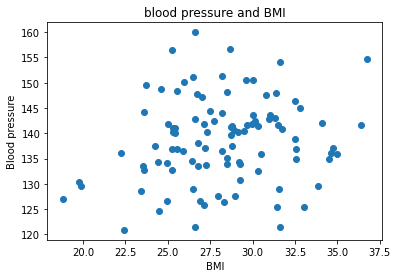

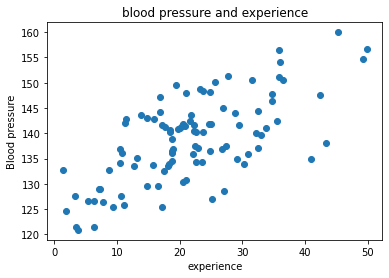

,sbp,bmi,age,experience
count,100.000000,100.000000,100.000000,100.000000
mean,138.638578,28.242331,47.649113,21.667301
std,8.375021,3.558462,9.691511,10.495993
min,120.879681,18.793845,20.947123,1.339974
25%,133.717046,25.544730,43.019929,15.483127
50%,139.338181,28.256296,48.257512,21.000352
75%,143.171947,30.549641,53.532308,27.521661
max,159.990311,36.742302,72.278148,49.869737


In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
from google.colab import files

#files.upload()
#df = pd.read_excel('task2.xlsx', index_col=0)#Data Frame

plt.scatter(bmi, sbp)
plt.title('blood pressure and BMI')
plt.xlabel('BMI')
plt.ylabel('Blood pressure')
plt.show()

plt.scatter(experience, sbp)
plt.title('blood pressure and experience')
plt.xlabel('experience')
plt.ylabel('Blood pressure')
plt.show()

df.describe()

In [ ]:
from scipy import stats

corr, pValue = stats.pearsonr(experience, sbp)
print(corr, pValue)

0.16647923474756518 0.09783613492772071
0.6807914336140751 6.563603325266749e-15


Поскольку p-value = $6.563 \, 10^{-15}$, нулевую гипотезу о том, что стаж не коррелирован с уровнем систолического АД отвергаем как противоречащую экспериментальным данным.

# Задача 2

### Постановка задачи

Рабочие утверждают, что потеряли здоровье на заводе, так как артериальная гипертензия коррелирована (как было показано в предыдущем пункте) со стажем.
Работодатель в свою очередь утверждает, что артериальная гипертензия у стажированных рабочих вызвана их возрастом, а не вредным стажем.

Как проверить, кто прав в этом споре: рабочие или работодатель?

**Определение**

Ложная корреляция - корреляция, которая возникла не в результате прямого соотношения между оцениваемыми переменными, а в результате их связей с третьей переменной (или четвертой, или более); при этом нет никакой связи, объединяющей эти переменные.

Для исключения влияния третьей переменной вычисляют частный коэффициент корреляции при исключенном влиянии третьей.


Нужно найти частный коэффициент корреляции систолического АД и стажа при исключенном влиянии возраста.


In [ ]:
!pip install pingouin
import pingouin as pg

df = pg.read_dataset('partial_corr')
pg.partial_corr(data=df, x='experience', y='sbp', covar='age')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,100,-0.043584,"[-0.24, 0.15]",0.0019,-0.01868,0.666782,0.137,0.071409


Поскольку 95% доверительный интервал для частного коэффициента корреляции систолического АД и стажа при исключенном влиянии возраста включает 0, можно считать,  что на данной выборке рабочих связь между уровнем систолического АД и стажем не доказана. (Точнее говоря линейная связь не доказана). Дело в возрасте, а не стаже.

# Задача 3

### Постановка задачи

Известно, что физическое развитие способствует умственному развитию детей. В эксперименте участвовало 10 детей, которых упорядочили по IQ, присвоив места от 1 до 10. Также были проведены измерения физический силы детей, после чего также присвоины мемста от 1 до 10. Таблица мест приведена

   reitingIQ  reitingPhis

          1            3

          2            2
          
          3            4
          
          4            1
          
          5            5
          
          6            6
          
          7            9
          
          8            7
          
          9            8
         
         10           10


В случае елси изумаемые факторы относятся к порядковой шкале, вычисляют коэффициент ранговой корреляции Спирмена.

**Определение**

Коэффициент ранговой корреляции Спирмена - это числовая оценка тесноты связи между признаками, используемая в непараметрических методах.

In [ ]:
reitingIQ = [i for i in range(1, 12)]
reitingPhis = [3, 2, 4, 1, 5, 6, 9, 7, 8, 10]
df = pd.DataFrame(list(zip(reitingIQ, reitingPhis)), columns=['reitingIQ', 'reitingPhis'])
df

,reitingIQ,reitingPhis
0,1,3
1,2,2
2,3,4
3,4,1
4,5,5
5,6,6
6,7,9
7,8,7
8,9,8
9,10,10


In [ ]:
from scipy.stats import spearmanr

# calculate spearman's correlation
corr, pvalue = spearmanr(df[['reitingIQ', 'reitingPhis']])
print('Spearmans correlation coefficinet: %.3f' % corr)
print('Spearmans correlation pvalue: %.3f' % pvalue)
#Non intervak scale, use Spearmans correlation

Spearmans correlation coefficinet: 0.879
Spearmans correlation pvalue: 0.001


Поскольку p-value = $0.001,$ нулевую гипотезу о том, что Q не коррелирован с уровнемфизического развития отвергаем как противоречащую экспериментальным данным.

Аналогично, можно использовать коэффициент корреляции Кенделла (Kendall tau rank correlation coefficient)

In [ ]:
from scipy.stats import kendalltau

coef, p = kendalltau(df['reitingIQ'], df['reitingPhis'])
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Kendall correlation coefficient: 0.733
Samples are correlated (reject H0) p=0.002
